In [1]:
import pandas as pd
#read the data set
dataset= pd.read_csv("NFLX.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [2]:
#checking for null values
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
#checking for duplicate data
dataset.duplicated().sum()

0

In [4]:
#analysing the data
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4.581000e+03
mean,78.031471,79.285690,76.736079,78.072056,78.072056,1.760516e+07
std,118.372084,120.276839,116.376768,118.435303,118.435303,1.971130e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.778571,3.857143,3.685714,3.784286,3.784286,6.908900e+06
50%,15.392858,15.671429,14.970000,15.324286,15.324286,1.155350e+07
75%,97.830002,99.529999,96.760002,97.889999,97.889999,2.113440e+07
max,567.979980,575.369995,520.960022,548.729980,548.729980,3.234140e+08


In [5]:
#dividing the numerical data and categorical
numerical_columns= dataset.columns[dataset.dtypes!='object']
categorical_columns=dataset.columns[dataset.dtypes=='object']
print("numerical columns are:")
print(numerical_columns)
print("categorical columns are:")
print(categorical_columns)

numerical columns are:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
categorical columns are:
Index(['Date'], dtype='object')


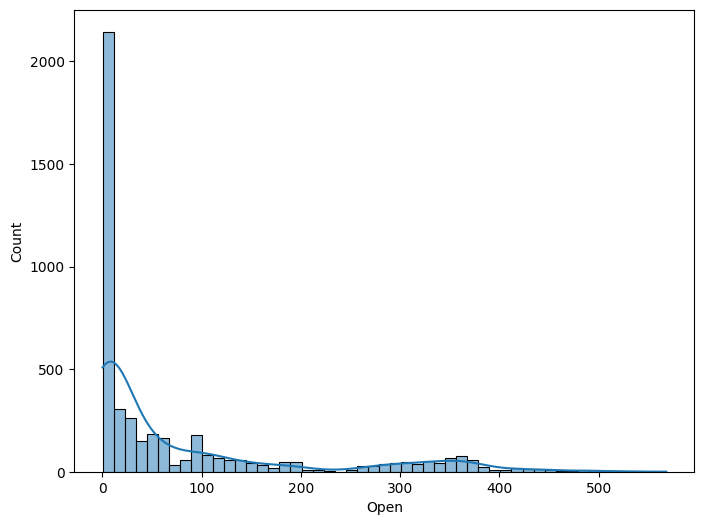

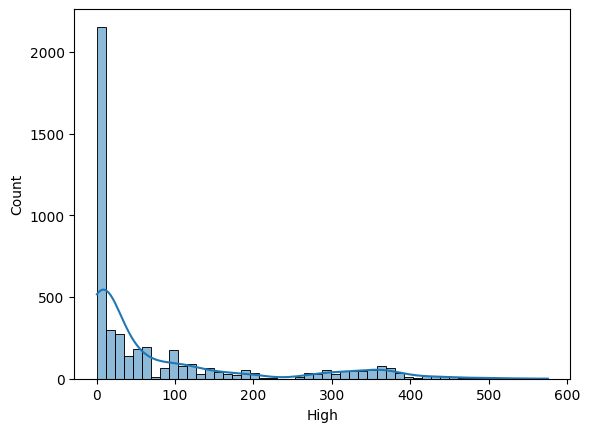

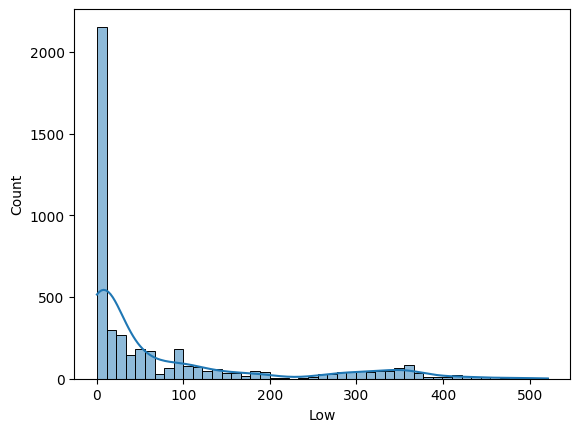

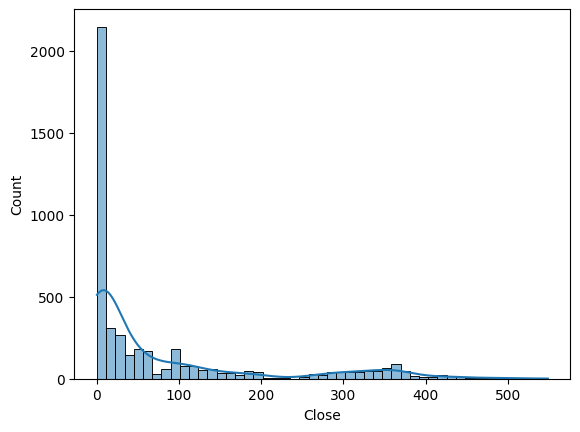

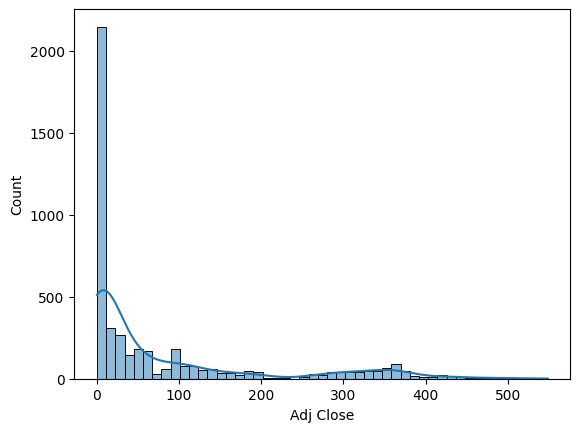

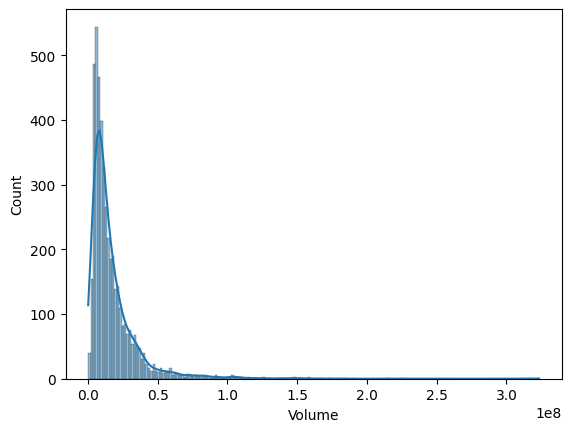

In [6]:
#plotting each column
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
  sns.histplot(data=dataset, x=i,kde=True)
  print("\n")
  plt.show()

<Axes: >

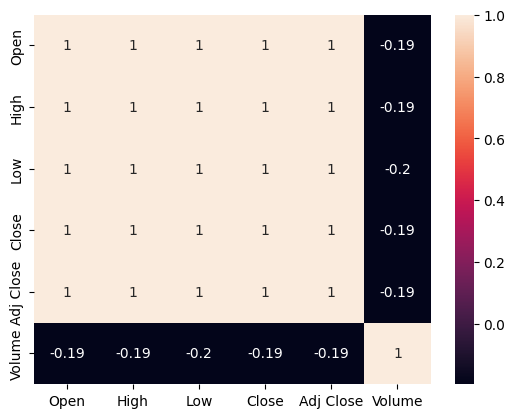

In [7]:
#analysing the correlation between the columns
sns.heatmap(dataset[numerical_columns].corr(),annot=True)

In [8]:
#target variabel is volume
x= dataset.drop('Volume',axis=1)
y= dataset['Volume']

In [20]:
import datetime
# Convert date to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])
# Convert datetime to timestamp
dataset['Date'] = dataset['Date'].apply(lambda x: x.timestamp())
print(x)

            Date        Open        High         Low       Close   Adj Close
0     2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429
1     2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000
2     2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143
3     2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571
4     2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429
...          ...         ...         ...         ...         ...         ...
4576  2020-07-28  496.019989  497.790009  487.760010  488.510010  488.510010
4577  2020-07-29  492.250000  494.920013  484.130005  484.480011  484.480011
4578  2020-07-30  480.709991  488.350006  477.510010  485.799988  485.799988
4579  2020-07-31  488.290009  494.799988  484.500000  488.880005  488.880005
4580  2020-08-03  490.859985  503.089996  490.230011  498.619995  498.619995

[4581 rows x 6 columns]


In [10]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{model_name} MSE: {mse}")

Linear Regression MSE: 369542683678773.2
Random Forest Regressor MSE: 216617562189737.56
Support Vector Regression MSE: 442120572573407.44


In [30]:
import pickle
random_forest_model=RandomForestRegressor()
random_forest_model.fit(x_train,y_train)
pickle_filename='random_forest_model.pkl'
with open(pickle_filename,'wb') as file:
  pickle.dump(random_forest_model,file)
  print(f'model saved to {pickle_filename}')

model saved to random_forest_model.pkl


In [31]:
with open(pickle_filename,'rb') as file:
  loaded_model=pickle.load(file)
  y_pred = loaded_model.predict(x_test)
  print("prediction:",y_pred)

prediction: [16860781. 29418235. 12529871. ...  9788479.  4111419.  7700203.]
